# ¡Hola Ian! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Ian completaste todas las tareas propuestas para el proyecto de manera sobresaliente. Demostraste un excelente manejo de las herramientas de manipulación y visualización de datos.

Como sugerencia para fortalecer aún más tu análisis estadístico, sería conveniente incorporar la prueba de Levene antes de realizar comparaciones de medias, ya que esto asegurará que tus resultados sean más robustos y confiables.

Continúa desarrollando estas habilidades, ya que serán claves en futuros proyectos.

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-------

# Analisis exploratorio de datos
## 1.- Importar librerias

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## 2.- Leer archivos

In [2]:
df_01 = pd.read_csv("/datasets/project_sql_result_01.csv")
df_04 = pd.read_csv("/datasets/project_sql_result_04.csv")
df_07 = pd.read_csv("/datasets/project_sql_result_07.csv")

## 3.- Analizar datos
### Información df_01

In [3]:
df_01

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [4]:
print(df_01.head(0))

Empty DataFrame
Columns: [company_name, trips_amount]
Index: []


### Tipos de datos

In [5]:
print(df_01.head(10))
df_01.info()

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### Valores nulos

In [6]:
print(df_01.isnull().sum())
print(df_01.isna().sum())

company_name    0
trips_amount    0
dtype: int64
company_name    0
trips_amount    0
dtype: int64


### Valores duplicados

In [7]:
duplicados_01 = df_01.duplicated().sum()
print(duplicados_01)

0


### Revisión de datos internos

In [8]:
nombres = df_01['company_name']
unicos_nombres = sorted(nombres.dropna().unique())
print(unicos_nombres)

['0118 - 42111 Godfrey S. Awir', '1085 - 72312 N and W Cab Co', '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih Company', '2192 - 73487 Zeymane Corp', '2241 - 44667 - Felman Corp', '24 Seven Taxi', '2733 - 74600 Benny Jona', '2809 - 95474 C & D Cab Co Inc.', '2823 - 73307 Lee Express Inc', '3011 - 66308 JBL Cab Inc.', '303 Taxi', '3556 - 36214 RC Andrews Cab', '3591 - 63480 Chuks Cab', '3620 - 52292 David K. Cab Corp.', '3623 - 72222 Arrington Enterprises', '3721 - Santamaria Express', '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson', '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa', '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc', '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.', '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.', '6742 - 83735 Tasha Ride Inc', '6743 - 78771 Luhak Corp', 'American United', 'American United Taxi Affiliation', 'Blue Diamond', 'Blue Ribbon Taxi Association Inc.', 'Checker Taxi', 'Checker Taxi Affi

In [9]:
def clasificar_afiliacion(name):
    if pd.isna(name):
        return np.nan
    name = name.lower()
    if 'yellow' in name:
        return 'Yellow Cab'
    elif 'checker' in name:
        return 'Checker Taxi'
    elif 'flash' in name:
        return 'Flash Cab'
    elif 'american united' in name:
        return 'American United'
    elif 'blue diamond' in name:
        return 'Blue Diamond'
    elif 'globe' in name:
        return 'Globe Taxi'
    elif 'metro' in name:
        return 'Metro Taxi'
    elif 'choice' in name:
        return 'Choice Taxi'
    elif 'sun' in name:
        return 'Sun Taxi'
    elif 'top cab' in name:
        return 'Top Cab'
    elif 'norshore' in name:
        return 'Norshore Cab'
    elif 'service taxi' in name:
        return 'Service Taxi'
    elif 'taxi affiliation services' in name:
        return 'Taxi Affiliation Services'
    elif 'city service' in name:
        return 'City Service'
    elif 'koam' in name:
        return 'KOAM Taxi'
    elif 'patriot' in name or 'peace taxi' in name:
        return 'Patriot Taxi'
    elif 'setare' in name:
        return 'Setare Inc'
    elif 'nova' in name:
        return 'Nova Taxi'
    elif 'dispatch' in name:
        return 'Dispatch Taxi'
    elif '303 taxi' in name:
        return '303 Taxi'
    elif '5 star' in name:
        return '5 Star Taxi'
    elif 'chicago' in name:
        return 'Chicago Taxi'
    elif 'leonard' in name:
        return 'Leonard Cab Co'
    else:
        return 'Individual/Other'
df_01['affiliation'] = df_01['company_name'].apply(clasificar_afiliacion)
print(df_01[['company_name', 'affiliation']].head(10))

                        company_name                affiliation
0                          Flash Cab                  Flash Cab
1          Taxi Affiliation Services  Taxi Affiliation Services
2                  Medallion Leasing           Individual/Other
3                         Yellow Cab                 Yellow Cab
4    Taxi Affiliation Service Yellow                 Yellow Cab
5          Chicago Carriage Cab Corp               Chicago Taxi
6                       City Service               City Service
7                           Sun Taxi                   Sun Taxi
8          Star North Management LLC           Individual/Other
9  Blue Ribbon Taxi Association Inc.           Individual/Other


### Notas
    -Los nombres de las columnas se ven bien.
    -Los tipos de datos parecen ser correctos.
    -No parece haber datos faltantes.
    -No parece haber datos duplicados.
    -Parece haber error con los nombres de las companias ya que tienen cantidades numéricas, pueden ser licencias de empresas; tambien hay nombres muy parecidos por lo que pueden ser sus variables, entonces se podria realizar otra columna la cual indique su afiliación.
    -Podriamos suponer que puede haber entonces alguna letra o palabras en las cantidades pero al saber que son de tipo entero no es necesario.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

Además hiciste un buen trabajo comprobando la presencia de datos duplicados y faltantes, esto es clave para verificar la integridad del dataset y evitar sesgos o errores al momento de analizar los datos

Asimismo, hiciste un buen análisis de los nombres de la compañias esto es clave para desarrollar un estudio adecuado de la información


</div>

### Información df_04

In [10]:
df_04

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [11]:
print(df_04.head(0))

Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


### Tipos de datos

In [12]:
print(df_04.head(10))
df_04.info()

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### Valores nulos

In [13]:
print(df_04.isnull().sum())
print(df_04.isna().sum())

dropoff_location_name    0
average_trips            0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64


### Valores duplicados

In [14]:
duplicados_04 = df_04.duplicated().sum()
print(duplicados_04)

0


### Revisión de datos internos

In [15]:
location = df_04['dropoff_location_name']
unique_location = sorted(location.dropna().unique())
print(unique_location)

['Albany Park', 'Andersonville', 'Archer Heights', 'Armour Square', 'Ashburn', 'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale', 'Belmont Cragin', 'Beverly', 'Boystown', 'Bridgeport', 'Brighton Park', 'Bucktown', 'Burnside', 'Calumet Heights', 'Chatham', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Douglas', 'Dunning', 'East Side', 'East Village', 'Edgewater', 'Edison Park', 'Englewood', 'Fuller Park', 'Gage Park', 'Garfield Park', 'Garfield Ridge', 'Gold Coast', 'Grand Boulevard', 'Grand Crossing', 'Grant Park', 'Hegewisch', 'Hermosa', 'Humboldt Park', 'Hyde Park', 'Irving Park', 'Jackson Park', 'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park', 'Lincoln Square', 'Little Italy, UIC', 'Little Village', 'Logan Square', 'Loop', 'Lower West Side', 'Mckinley Park', 'Montclare', 'Morgan Park', 'Mount Greenwood', 'Museum Campus', 'Near South Side', 'New City', 'North Center', 'North Lawndale', 'North Park', 'Norwood Park', "O'Hare", 'Oakland', 'Old Town', 'Portage Park', 'Pullman', 

### Notas
    -Los nombres de las columnas se ven bien.
    -Los tipos de datos parecen ser correctos.
    -No parece haber datos faltantes.
    -No parece haber datos duplicados.
    -No parece haber error en los nombres de las locaciones.

### Información df_07

In [16]:
df_07

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [17]:
print(df_07.head(0))

Empty DataFrame
Columns: [start_ts, weather_conditions, duration_seconds]
Index: []


In [18]:
print(df_07.head(10))
df_07.info()

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
5  2017-11-11 04:00:00               Good            1320.0
6  2017-11-04 16:00:00                Bad            2969.0
7  2017-11-18 11:00:00               Good            2280.0
8  2017-11-11 14:00:00               Good            2460.0
9  2017-11-11 12:00:00               Good            2040.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null

### Tipos de datos

In [19]:
print(df_07.head(10))
df_07.info()

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
5  2017-11-11 04:00:00               Good            1320.0
6  2017-11-04 16:00:00                Bad            2969.0
7  2017-11-18 11:00:00               Good            2280.0
8  2017-11-11 14:00:00               Good            2460.0
9  2017-11-11 12:00:00               Good            2040.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null

In [20]:
df_07['start_ts'] = pd.to_datetime(df_07['start_ts'])
df_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### Valores nulos

In [21]:
print(df_07.isnull().sum())
print(df_07.isna().sum())

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


### Valores duplicados

In [22]:
duplicados_07 = df_07.duplicated().sum()
print(duplicados_07)

197


In [23]:
df_sin_duplicados = df_07.drop_duplicates()
print(df_sin_duplicados.duplicated().sum())

0


### Revisión de datos internos

In [24]:
condiciones = df_07['weather_conditions']
unique_conditions = sorted(condiciones.dropna().unique())
print(unique_conditions)

['Bad', 'Good']


### Notas
    -Los nombres de las columnas se ven bien.
    -Se tiene que cambiar la primera columna a tipo datatime
    -No parece haber datos faltantes.
    -Existen 197 datos duplicados
    -No parece haber error en los nombres de las locaciones.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Escelente trabajo replicando el análsis para los demás datasets

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como sugerencia, cuando realices el mismo proceso de análisis o revisión a varios datasets, vale la pena crea una función (`def`) para evitar replicar bloques de código

</div>

</div>

## 4.- Identificar los 10 principales barrios en términos de finalización del recorrido

In [25]:
top_10_neighborhoods = df_04.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_neighborhoods) #Aunque ya estaban en orden por default, lo podemos realizar para asegurar que si estuvieran en el orden 

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


## 5.- Gráficos
### empresas de taxis y número de viajes

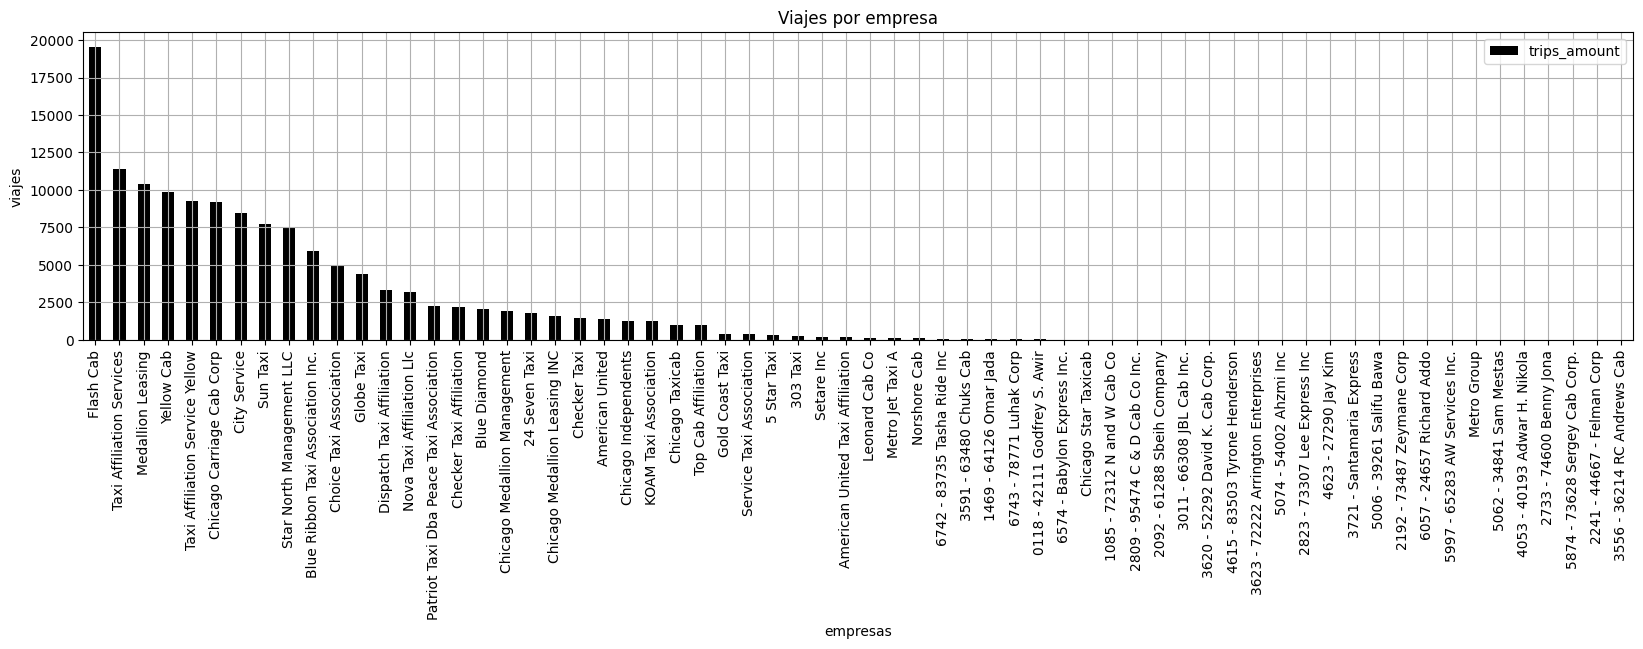

In [26]:
df_01.plot(x = "company_name", 
           y = "trips_amount",
           kind = "bar",
           title = "Viajes por empresa", 
           xlabel = "empresas",
           ylabel = "viajes",
           grid = True,
           figsize = [20,4],
           color = "black")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo con la gráfica! Se observa que Flash Cab lidera en volumen de viajes, lo que sugiere una fuerte concentración del mercado. Esto puede estar relacionado con su cobertura, cantidad de vehículos o buenas estrategias comerciales.

</div>

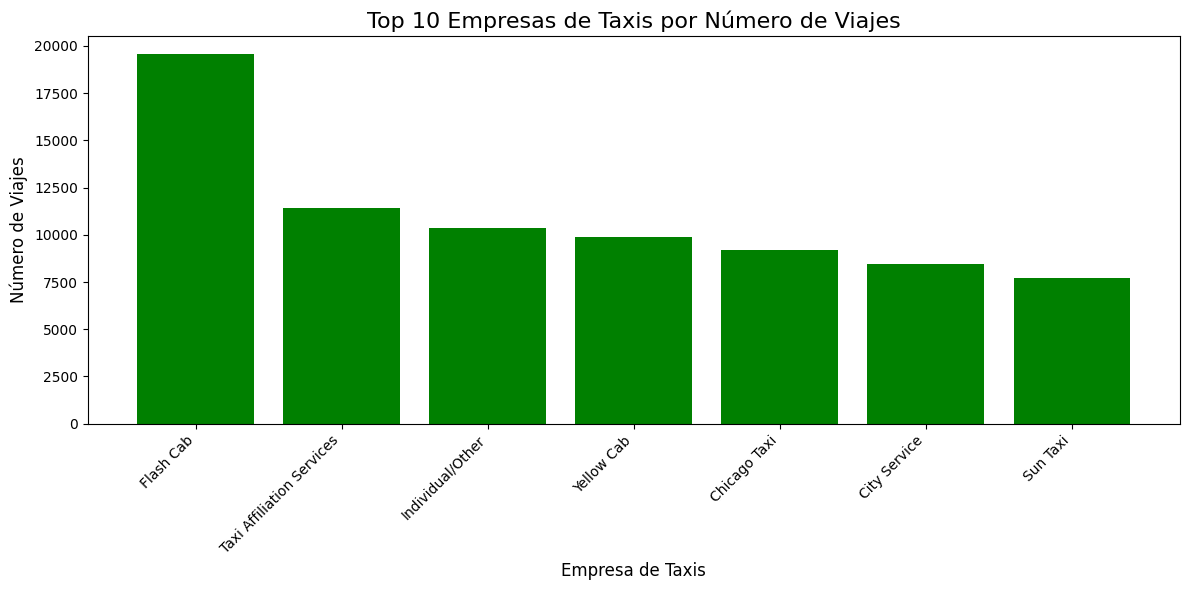

In [28]:
df_sorted = df_01.sort_values(by='trips_amount', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['affiliation'], df_sorted['trips_amount'], color = "green")
plt.title('Top 10 Empresas de Taxis por Número de Viajes', fontsize=16)
plt.xlabel('Empresa de Taxis', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
print(df_sorted)

                        company_name  trips_amount                affiliation
0                          Flash Cab         19558                  Flash Cab
1          Taxi Affiliation Services         11422  Taxi Affiliation Services
2                  Medallion Leasing         10367           Individual/Other
3                         Yellow Cab          9888                 Yellow Cab
4    Taxi Affiliation Service Yellow          9299                 Yellow Cab
5          Chicago Carriage Cab Corp          9181               Chicago Taxi
6                       City Service          8448               City Service
7                           Sun Taxi          7701                   Sun Taxi
8          Star North Management LLC          7455           Individual/Other
9  Blue Ribbon Taxi Association Inc.          5953           Individual/Other


### 10 barrios principales por número de finalizaciones

In [ ]:
dftop_10 = df_04.head(10)
plt.bar(dftop_10["dropoff_location_name"],dftop_10["average_trips"], color = "coral")
plt.xlabel("empresas")
plt.ylabel("viajes")
plt.title("10 barrios principales por finalizaciones")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Conclusiones
#### Primer gráfico
    -Flash Cab y Yellow parecen ser las empresas con mayores viajes
    -Las empresas más pequeñas podemos afirmar que son aquellas con licencias en su nombre
#### Segundo gráfico
    -Los barrios con mayores finalizaciones son Loop y River North

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Buen trabajo obteniendo el Top de barrios! Lograste identificar y jerarquizar bien los de mayor actividad, destacando la diferencia notable con barrios como Loop y River North, que seguramente destacan por su relevancia comercial y turística.

</div>

## 6.- Hipotesis

In [30]:
df_07['weekday'] = df_07['start_ts'].dt.day_name()
rainy_saturdays = df_07[(df_07['weekday'] == 'Saturday') & (df_07['weather_conditions'] == 'Bad')]['duration_seconds']
other_days = df_07[(df_07['weekday'] != 'Saturday') | (df_07['weather_conditions'] != 'Bad')]['duration_seconds']
# Hipótesis nula (H0): La duración promedio de los viajes es la misma en ambos grupos.
# Hipótesis alternativa (H1): La duración promedio de los viajes es diferente en ambos grupos.
# Nivel de significación (alfa): 0.05

t_statistic, p_value = stats.ttest_ind(rainy_saturdays, other_days, equal_var=False)
print("="*50)
print("Resultados del Análisis de Hipótesis")
print("="*50)
print(f"Número de viajes en sábados lluviosos: {len(rainy_saturdays)}")
print(f"Duración promedio en sábados lluviosos: {rainy_saturdays.mean():.2f} segundos")
print("-" * 50)
print(f"Número de viajes en otros días: {len(other_days)}")
print(f"Duración promedio en otros días: {other_days.mean():.2f} segundos")
print("-" * 50)
print(f"Estadístico t: {t_statistic:.4f}")
print(f"Valor p: {p_value}")
alpha = 0.05
print("-" * 50)
if p_value < alpha:
    print(f"Dado que el valor p ({p_value:.4f}) es menor que el nivel de significación ({alpha}), se rechaza la hipótesis nula.")
    print("Conclusión: La duración promedio de los viajes cambia de manera estadísticamente significativa en los sábados lluviosos.")
else:
    print(f"Dado que el valor p ({p_value:.4f}) es mayor o igual que el nivel de significación ({alpha}), no se puede rechazar la hipótesis nula.")
    print("Conclusión: No hay suficiente evidencia para afirmar que la duración promedio de los viajes cambia en los sábados lluviosos.")

Resultados del Análisis de Hipótesis
Número de viajes en sábados lluviosos: 180
Duración promedio en sábados lluviosos: 2427.21 segundos
--------------------------------------------------
Número de viajes en otros días: 888
Duración promedio en otros días: 1999.68 segundos
--------------------------------------------------
Estadístico t: 7.1860
Valor p: 6.738994326108734e-12
--------------------------------------------------
Dado que el valor p (0.0000) es menor que el nivel de significación (0.05), se rechaza la hipótesis nula.
Conclusión: La duración promedio de los viajes cambia de manera estadísticamente significativa en los sábados lluviosos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Ian aplicaste correctamente la prueba de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula, logrando comprobar que el clima sí afecta la duración de los viajes en Taxi

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la *prueba t* sea estadísticamente válida.

</div>

</div>